# Assignment No.4

# 1)  Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\data science csv files\delivery_time assig no 4.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.shape

(21, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
data=data.rename(columns={'Delivery Time': 'DelT', 'Sorting Time': 'SortT'})
data

,DelT,SortT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
data.corr()

,DelT,SortT
DelT,1.000000,0.825997
SortT,0.825997,1.000000


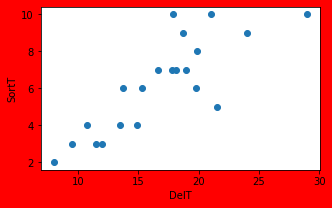

In [30]:
plt.figure(figsize=(5,3),facecolor='red')
plt.scatter(data['DelT'],data['SortT'])
plt.xlabel('DelT')
plt.ylabel('SortT')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DelT', ylabel='Density'>

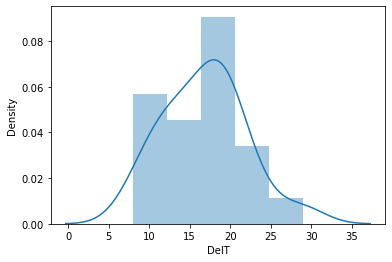

In [31]:
sns.distplot(data['DelT'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortT', ylabel='Density'>

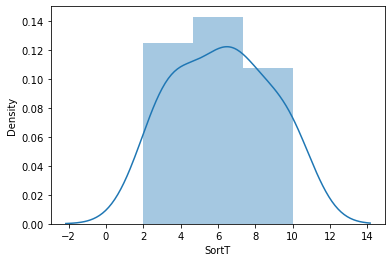

In [32]:
sns.distplot(data['SortT'])

In [33]:
X=data['DelT'].values.reshape(21,1)
Y=data['SortT'].values.reshape(21,1)

In [34]:
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [35]:
Y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [36]:
LR=LinearRegression()
model=LR.fit(Y,X)

In [37]:
model.coef_

array([[1.6490199]])

In [38]:
model.intercept_

array([6.58273397])

In [39]:
predictions=model.predict(Y)
predictions

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [40]:
pd.DataFrame({'DelT':X.flatten(),
             'SortT':Y.flatten(),
             'Predictions':predictions.flatten()})

,DelT,SortT,Predictions
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


<AxesSubplot:xlabel='SortT', ylabel='DelT'>

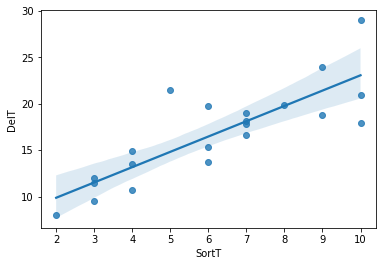

In [19]:
sns.regplot(x=data['SortT'],y=data['DelT'])

In [20]:
## Build a modul
model=smf.ols("DelT~np.log(SortT)",data=data).fit()

In [21]:
model

In [23]:
model.params

Intercept        1.159684
np.log(SortT)    9.043413
dtype: float64

In [24]:
model.tvalues

Intercept        0.472460
np.log(SortT)    6.586789
dtype: float64

In [25]:
model.pvalues

Intercept        0.641980
np.log(SortT)    0.000003
dtype: float64

In [26]:
model.rsquared

0.6954434611324223

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DelT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        22:20:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortT)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model2=smf.ols("SortT~np.log(DelT)",data=data).fit()

In [43]:
model2

In [44]:
model2.params

Intercept      -12.499233
np.log(DelT)     6.735548
dtype: float64

In [45]:
model2.tvalues

Intercept      -4.543446
np.log(DelT)    6.836088
dtype: float64

In [46]:
model2.pvalues

Intercept       0.000222
np.log(DelT)    0.000002
dtype: float64

In [47]:
model2.rsquared

0.7109478980584186

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SortT   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                        22:27:46   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DelT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
data['SortT_Square']=data['SortT']**2
model3=smf.ols("np.log(DelT)~SortT+SortT_Square",data=data).fit()
model3


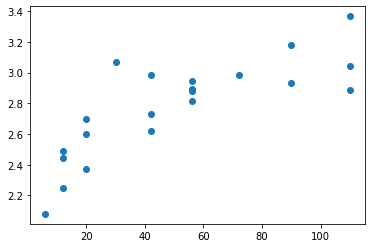

In [64]:
plt.scatter(data['SortT']+data['SortT_Square'],np.log(data['DelT']))

In [66]:
model3.params

Intercept       1.699704
SortT           0.265922
SortT_Square   -0.012841
dtype: float64

In [67]:
model3.tvalues

Intercept       7.440736
SortT           3.314818
SortT_Square   -2.031650
dtype: float64

In [69]:
model3.pvalues

Intercept       6.771099e-07
SortT           3.853154e-03
SortT_Square    5.721977e-02
dtype: float64

In [70]:
model4.rsquared

0.764866634295373

In [71]:
data['reciprocal_SortT']=1/data['SortT']
model4=smf.ols("np.log(DelT)~reciprocal_SortT",data=data).fit()

In [72]:
model4.params

Intercept           3.302922
reciprocal_SortT   -2.660538
dtype: float64

In [73]:
model4.tvalues

Intercept           43.629523
reciprocal_SortT    -7.843895
dtype: float64

In [74]:
model4.pvalues

Intercept           1.622389e-20
reciprocal_SortT    2.243017e-07
dtype: float64

In [75]:
model4.rsquared

0.7640533808614293

In [76]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(DelT)   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.24e-07
Time:                        22:32:43   Log-Likelihood:                 9.9235
No. Observations:                  21   AIC:                            -15.85
Df Residuals:                      19   BIC:                            -13.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3029      0.076     43.630      0.000       3.144       3.461
reciprocal_SortT    -2.6605      0.339     -7.844      0.000      -3.370      -1.951
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.532
Skew:                           0.380   Prob(JB):                        0.767
Kurtosis:                       2.825   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf

In [78]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\data science csv files\Salary_Data assig no 4.csv")

In [79]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [82]:
data.shape

(30, 2)

In [83]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [84]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


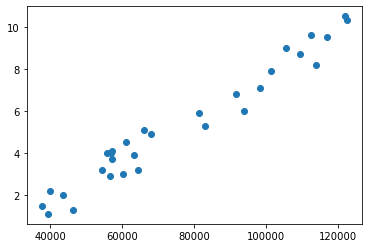

In [85]:
plt.scatter(data['Salary'],data['YearsExperience'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

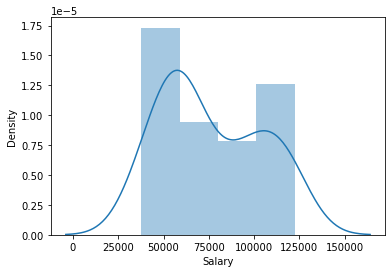

In [86]:
sns.distplot(data['Salary'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

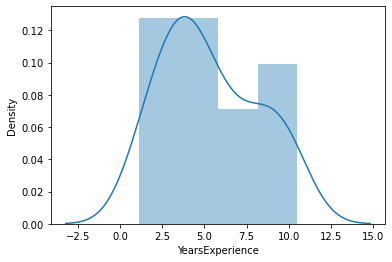

In [87]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

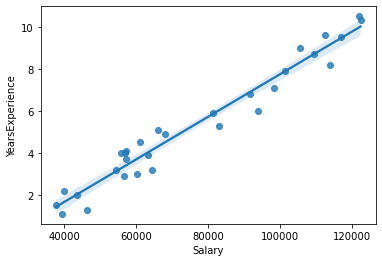

In [88]:
sns.regplot(x='Salary',y='YearsExperience',data=data)

In [89]:
model =smf.ols('Salary~YearsExperience',data=data).fit()

In [90]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [91]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [92]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [93]:
model.rsquared

0.9569566641435086

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        22:45:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

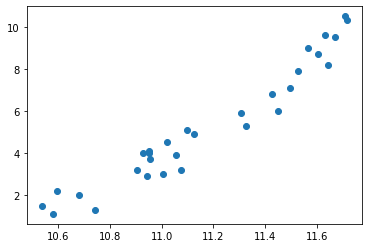

In [96]:
plt.scatter(np.log(data['Salary']),data['YearsExperience'])

In [97]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [99]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [100]:
model2.tvalues

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64

In [101]:
model2.pvalues

Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64

In [102]:
model2.rsquared

0.8538888828756969

In [103]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        22:47:27   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

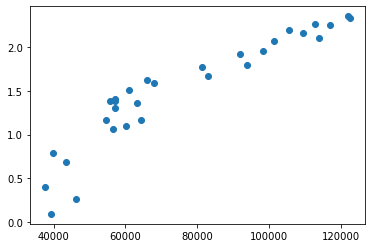

In [104]:
plt.scatter(data["Salary"],np.log(data["YearsExperience"]))

In [105]:
model3=smf.ols("YearsExperience~np.log(Salary)",data=data).fit()

In [106]:
model3.params

Intercept        -77.696132
np.log(Salary)     7.428821
dtype: float64

In [107]:
model3.tvalues

Intercept        -18.321589
np.log(Salary)    19.584833
dtype: float64

In [108]:
model3.pvalues

Intercept         3.988518e-17
np.log(Salary)    7.027439e-18
dtype: float64

In [109]:
model3.rsquared

0.9319671194084195

In [110]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        22:49:33   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
data['YearsExperience_Square']=data['YearsExperience']**2
model4=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Square",data=data).fit()
model4

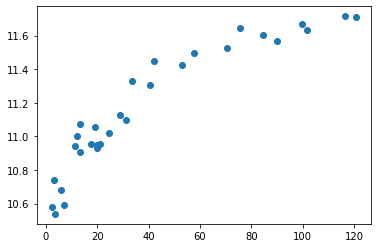

In [112]:
plt.scatter(data['YearsExperience']+data['YearsExperience_Square'],np.log(data['Salary']))

In [113]:
model4.params

Intercept                 10.336852
YearsExperience            0.202382
YearsExperience_Square    -0.006614
dtype: float64

In [114]:
model4.tvalues

Intercept                 154.368412
YearsExperience             7.601136
YearsExperience_Square     -2.957139
dtype: float64

In [116]:
model4.pvalues

Intercept                 2.559532e-41
YearsExperience           3.551262e-08
YearsExperience_Square    6.380581e-03
dtype: float64

In [117]:
model4.rsquared

0.948610863848735

In [118]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.95e-18
Time:                        22:51:20   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience            0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Square    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
data['reciprocal_YearsExperience']=1/data['YearsExperience']
model5=smf.ols("np.log(Salary)~reciprocal_YearsExperience",data=data).fit()

In [120]:
model5.params

Intercept                     11.584990
reciprocal_YearsExperience    -1.506515
dtype: float64

In [121]:
model5.tvalues

Intercept                     178.556014
reciprocal_YearsExperience     -7.848682
dtype: float64

In [122]:
model5.pvalues

Intercept                     2.398014e-44
reciprocal_YearsExperience    1.504043e-08
dtype: float64

In [123]:
model5.rsquared

0.6875062998233084

In [125]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     61.60
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.50e-08
Time:                        22:52:44   Log-Likelihood:                 5.3140
No. Observations:                  30   AIC:                            -6.628
Df Residuals:                      28   BIC:                            -3.826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.5850      0.065    178.556      0.000      11.452      11.718
reciprocal_YearsExperience    -1.5065      0.192     -7.849      0.000      -1.900      -1.113
==============================================================================
Omnibus:                        8.949   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.329
Skew:                           0.141   Prob(JB):                        0.312
Kurtosis:                       1.665   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""